In [13]:
#hay una librería que se llama h2o que igual me ayuda
import seaborn as sns
import pandas as pd

In [14]:
df = pd.read_csv('input/diamonds_train.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276
...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,0.50,Ideal,E,VS1,61.9,56.0,5.09,5.12,3.16,1716
40341,40341,0.33,Ideal,D,VS2,61.8,56.0,4.40,4.44,2.73,781
40342,40342,0.40,Premium,G,VVS1,61.5,58.0,4.69,4.74,2.90,1123
40343,40343,1.06,Ideal,I,VS1,61.2,57.0,6.59,6.56,4.03,5651


In [15]:
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Premium' 'Ideal' 'Very Good' 'Fair' 'Good']
['F' 'D' 'E' 'J' 'H' 'I' 'G']
['VS1' 'SI1' 'VVS2' 'SI2' 'VS2' 'IF' 'VVS1' 'I1']


In [16]:
colors = {'F':1,
          'D':2,
          'E':3,
          'J':4,
          'H':5,
          'I':6,
          'G':7}
cut = {"Premium":5,
          "Ideal":4,
          "Very Good":3,
          "Good":2,
          "Fair":1}
clarity = {'VS1':1,
           'SI1':2,
           'VVS2':3,
           'SI2':4,
           'VS2':5,
           'IF':6,
           'VVS1':7,
           'I1':8}

In [17]:
#df.color = df.color.map(colors)
#df.cut = df.cut.map(cut)
#df.clarity = df.clarity.map(clarity)

In [18]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


Hago una matriz de correlación para ver qué datos puede que tengan que ver con el precio

In [19]:
corr = df.corr()
corr

,id,carat,depth,table,x,y,z,price
id,1.000000,0.001804,-0.003035,0.004436,0.003238,0.002021,0.002507,0.001823
carat,0.001804,1.000000,0.023118,0.181725,0.976267,0.945757,0.968685,0.922345
depth,-0.003035,0.023118,1.000000,-0.299534,-0.028765,-0.032894,0.092482,-0.013307
table,0.004436,0.181725,-0.299534,1.000000,0.195775,0.182559,0.154399,0.126545
x,0.003238,0.976267,-0.028765,0.195775,1.000000,0.967143,0.985385,0.886168
y,0.002021,0.945757,-0.032894,0.182559,0.967143,1.000000,0.960350,0.860499
z,0.002507,0.968685,0.092482,0.154399,0.985385,0.960350,1.000000,0.876061
price,0.001823,0.922345,-0.013307,0.126545,0.886168,0.860499,0.876061,1.000000


#####  Las predicciones mejoran haciendo get_dummies()
Así que voy a exportar el dataset limpio con el que van a trabajar diferentes modelos para no tener que repetir ese proceso.

In [20]:
test = pd.read_csv('input/diamonds_test.csv')
dfcat = pd.get_dummies(df)
testcat = pd.get_dummies(test)

In [21]:
dfcat = pd.get_dummies(df)
testcat = pd.get_dummies(test)

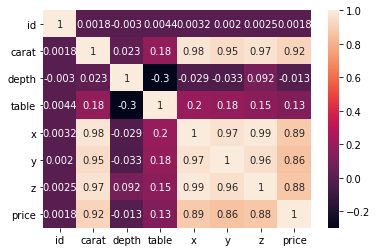

In [22]:
sns.heatmap(corr, annot=True)

Voy a despreciar las columnas x y z por estar relacionadas en la columna carat. Después veo que no mejora las predicciones así que decido no hacerlo.

```python
despr = ["x","y","z"]
dfcat = dfcat.drop(despr, axis='columns')
dfcat = dfcat.drop("id", axis="columns")
testcat = testcat.drop(despr, axis='columns')
```

In [23]:
dfcat.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.78,61.5,58.0,5.93,5.98,3.66,3446,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.31,60.8,56.0,4.37,4.32,2.64,732,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.30,62.3,54.0,4.30,4.34,2.69,475,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.04,62.0,58.0,6.54,6.46,4.03,9552,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.65,61.4,55.0,5.58,5.62,3.44,1276,0,0,...,0,1,0,0,1,0,0,0,0,0


In [24]:
dfcat.to_csv('input/train.csv', header=True, index=False)
testcat.to_csv('input/test.csv', header=True, index=False)